## Defining a basic transport network
In this notebook, we show how to setup a  simple transport network. 

We take the following steps:

1. [Imports](#1.-Imports)
2. [Create graph](#2.-Create-graph)
3. [Inspect paths](#5.-Inspect-paths)

### 1. Imports
We start with importing required libraries

In [1]:
# package(s) used for creating and geo-locating the graph
import networkx as nx  
import shapely.geometry

# package(s) related to the simulation (creating the vessel, running the simulation)
import opentnsim

# package(s) needed for plotting
import matplotlib.pyplot as plt

print('This notebook is executed with OpenTNSim version {}'.format(opentnsim.__version__))

This notebook is executed with OpenTNSim version 1.1.2


### 2. Create graph
OpenTNSim works with mix-in classes to allow for flexibility in defining nodes. 

A graph contains *nodes* (blue dots in plot below) and *edges* (black lines in plot below).

In [2]:
# specify a number of coordinates along your route (coords are specified in world coordinates: lon, lat)
coords = [
    [0,0],
    [0,0.1], 
    [0.1,0.1], 
    [0.1,0]] 

In [3]:
# make your preferred Site class out of available mix-ins.
Node = type('Site', (opentnsim.core.Identifiable, opentnsim.core.Locatable), {})

# create a list of nodes
nodes = []
for index, coord in enumerate(coords):
    data_node = {"name": str(index), "geometry": shapely.geometry.Point(coord[0], coord[1])}
    nodes.append(Node(**data_node))

In [4]:
# create a graph based on coords and depths
FG = nx.DiGraph()

# add nodes
for node in nodes:
    FG.add_node(node.name, geometry = node.geometry)

# add edges
path = [
        [nodes[0], nodes[3]], # From node 0 to node 3 - so from node 0 to node 3 is one-way traffic   
        [nodes[0], nodes[1]], # From node 0 to node 1 - all other edges are two-way traffic
        [nodes[1], nodes[0]], # From node 1 to node 0
        [nodes[1], nodes[2]], # From node 1 to node 2
        [nodes[2], nodes[1]], # From node 2 to node 1
        [nodes[2], nodes[3]], # From node 2 to node 3
        [nodes[3], nodes[2]], # From node 3 to node 2
       ] 

for edge in path:
    FG.add_edge(edge[0].name, edge[1].name, weight = 1)

In [5]:
# create a positions dict for the purpose of plotting
positions = {}
for node in FG.nodes:
    positions[node] = (FG.nodes[node]['geometry'].x, FG.nodes[node]['geometry'].y)

In [6]:
# collect node labels
labels = {}
for node in FG.nodes:
    labels[node] = node

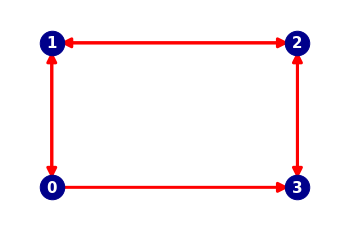

In [7]:
# draw edges, nodes and labels.
nx.draw_networkx_edges(FG,  pos=positions, width=3, edge_color="red", alpha=1, arrowsize=20)
nx.draw_networkx_nodes(FG,  pos=positions, node_color="darkblue", node_size=600)
nx.draw_networkx_labels(FG, pos=positions, labels=labels, font_size=15, font_weight='bold', font_color="white")

plt.axis("off")
plt.show()

### 3. Inspect paths
It is interesting to see that to go from Node 0 to Node 3 there are now two available paths.

In [8]:
print([p for p in nx.all_simple_paths(FG, source=nodes[0].name, target=nodes[3].name)])

[['0', '3'], ['0', '1', '2', '3']]
